# Spark 实战 IOT 资料分析

## 资料概观

In [53]:
import pandas as pd

In [6]:
!head -n 2 ../data/iot_devices.json

{"device_id": 1, "device_name": "meter-gauge-1xbYRYcj", "ip": "68.161.225.1", "cca2": "US", "cca3": "USA", "cn": "United States", "latitude": 38.000000, "longitude": -97.000000, "scale": "Celsius", "temp": 34, "humidity": 51, "battery_level": 8, "c02_level": 868, "lcd": "green", "timestamp" :1458444054093 }
{"device_id": 2, "device_name": "sensor-pad-2n2Pea", "ip": "213.161.254.1", "cca2": "NO", "cca3": "NOR", "cn": "Norway", "latitude": 62.470000, "longitude": 6.150000, "scale": "Celsius", "temp": 11, "humidity": 70, "battery_level": 7, "c02_level": 1473, "lcd": "red", "timestamp" :1458444054119 }


In [7]:
!pwd

/root/workspace/hellobi/src


## PART 1: 读取 JSON 档案

In [57]:
# fetch the JSON device information uploaded on our S3, now mounted on /mnt/datariders
jsonFile = "file:///root/workspace/hellobi/data/iot_devices.json"
# read the json file and create the dataset from the case class DeviceIoTData
#  ds is now a collection of JVM Scala objects DeviccIoTData
df = spark.read.json(jsonFile)

In [9]:
df.printSchema()

root
 |-- battery_level: long (nullable = true)
 |-- c02_level: long (nullable = true)
 |-- cca2: string (nullable = true)
 |-- cca3: string (nullable = true)
 |-- cn: string (nullable = true)
 |-- device_id: long (nullable = true)
 |-- device_name: string (nullable = true)
 |-- humidity: long (nullable = true)
 |-- ip: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- lcd: string (nullable = true)
 |-- longitude: double (nullable = true)
 |-- scale: string (nullable = true)
 |-- temp: long (nullable = true)
 |-- timestamp: long (nullable = true)



In [10]:
df.cache()

DataFrame[battery_level: bigint, c02_level: bigint, cca2: string, cca3: string, cn: string, device_id: bigint, device_name: string, humidity: bigint, ip: string, latitude: double, lcd: string, longitude: double, scale: string, temp: bigint, timestamp: bigint]

In [11]:
df.count()

198164

In [13]:
df.show()

+-------------+---------+----+----+-------------+---------+--------------------+--------+---------------+--------+------+---------+-------+----+-------------+
|battery_level|c02_level|cca2|cca3|           cn|device_id|         device_name|humidity|             ip|latitude|   lcd|longitude|  scale|temp|    timestamp|
+-------------+---------+----+----+-------------+---------+--------------------+--------+---------------+--------+------+---------+-------+----+-------------+
|            8|      868|  US| USA|United States|        1|meter-gauge-1xbYRYcj|      51|   68.161.225.1|    38.0| green|    -97.0|Celsius|  34|1458444054093|
|            7|     1473|  NO| NOR|       Norway|        2|   sensor-pad-2n2Pea|      70|  213.161.254.1|   62.47|   red|     6.15|Celsius|  11|1458444054119|
|            2|     1556|  IT| ITA|        Italy|        3| device-mac-36TWSKiT|      44|      88.36.5.1|   42.83|   red|    12.83|Celsius|  19|1458444054120|
|            6|     1080|  US| USA|United Stat

## PART 2: 分析资料

In [58]:
df.take(3)

[Row(battery_level=8, c02_level=868, cca2='US', cca3='USA', cn='United States', device_id=1, device_name='meter-gauge-1xbYRYcj', humidity=51, ip='68.161.225.1', latitude=38.0, lcd='green', longitude=-97.0, scale='Celsius', temp=34, timestamp=1458444054093),
 Row(battery_level=7, c02_level=1473, cca2='NO', cca3='NOR', cn='Norway', device_id=2, device_name='sensor-pad-2n2Pea', humidity=70, ip='213.161.254.1', latitude=62.47, lcd='red', longitude=6.15, scale='Celsius', temp=11, timestamp=1458444054119),
 Row(battery_level=2, c02_level=1556, cca2='IT', cca3='ITA', cn='Italy', device_id=3, device_name='device-mac-36TWSKiT', humidity=44, ip='88.36.5.1', latitude=42.83, lcd='red', longitude=12.83, scale='Celsius', temp=19, timestamp=1458444054120)]

In [68]:
pd.DataFrame(df.take(3), columns=df.columns)

,battery_level,c02_level,cca2,cca3,cn,device_id,device_name,humidity,ip,latitude,lcd,longitude,scale,temp,timestamp
0,8,868,US,USA,United States,1,meter-gauge-1xbYRYcj,51,68.161.225.1,38.00,green,-97.00,Celsius,34,1458444054093
1,7,1473,NO,NOR,Norway,2,sensor-pad-2n2Pea,70,213.161.254.1,62.47,red,6.15,Celsius,11,1458444054119
2,2,1556,IT,ITA,Italy,3,device-mac-36TWSKiT,44,88.36.5.1,42.83,red,12.83,Celsius,19,1458444054120


### 找出温度超过 30 以及湿度大于 70 的装置

In [28]:
## 使用 RDD
df.rdd.filter(lambda x: x.temp > 30 and x.humidity>70).take(3)

[Row(battery_level=0, c02_level=1466, cca2='US', cca3='USA', cn='United States', device_id=17, device_name='meter-gauge-17zb8Fghhl', humidity=98, ip='161.188.212.254', latitude=39.95, lcd='red', longitude=-75.16, scale='Celsius', temp=31, timestamp=1458444054129),
 Row(battery_level=9, c02_level=986, cca2='FR', cca3='FRA', cn='France', device_id=48, device_name='sensor-pad-48jt4eL', humidity=97, ip='90.37.208.1', latitude=43.88, lcd='green', longitude=4.9, scale='Celsius', temp=31, timestamp=1458444054151),
 Row(battery_level=8, c02_level=1436, cca2='US', cca3='USA', cn='United States', device_id=54, device_name='sensor-pad-5410CWPrNb6', humidity=73, ip='204.15.64.249', latitude=32.89, lcd='red', longitude=-117.13, scale='Celsius', temp=34, timestamp=1458444054155)]

In [31]:
## 使用 dataset
df.filter("temp > 30 and humidity > 70").take(3)

[Row(battery_level=0, c02_level=1466, cca2='US', cca3='USA', cn='United States', device_id=17, device_name='meter-gauge-17zb8Fghhl', humidity=98, ip='161.188.212.254', latitude=39.95, lcd='red', longitude=-75.16, scale='Celsius', temp=31, timestamp=1458444054129),
 Row(battery_level=9, c02_level=986, cca2='FR', cca3='FRA', cn='France', device_id=48, device_name='sensor-pad-48jt4eL', humidity=97, ip='90.37.208.1', latitude=43.88, lcd='green', longitude=4.9, scale='Celsius', temp=31, timestamp=1458444054151),
 Row(battery_level=8, c02_level=1436, cca2='US', cca3='USA', cn='United States', device_id=54, device_name='sensor-pad-5410CWPrNb6', humidity=73, ip='204.15.64.249', latitude=32.89, lcd='red', longitude=-117.13, scale='Celsius', temp=34, timestamp=1458444054155)]

### 显示前十个符合条件的项目

In [62]:
df_top10 = df.filter("temp > 30 and humidity > 70").sort("device_id").take(10)

In [69]:
pd.DataFrame(df_top10, columns = df.columns)

,battery_level,c02_level,cca2,cca3,cn,device_id,device_name,humidity,ip,latitude,lcd,longitude,scale,temp,timestamp
0,0,1466,US,USA,United States,17,meter-gauge-17zb8Fghhl,98,161.188.212.254,39.95,red,-75.16,Celsius,31,1458444054129
1,9,986,FR,FRA,France,48,sensor-pad-48jt4eL,97,90.37.208.1,43.88,green,4.90,Celsius,31,1458444054151
2,8,1436,US,USA,United States,54,sensor-pad-5410CWPrNb6,73,204.15.64.249,32.89,red,-117.13,Celsius,34,1458444054155
3,4,1090,US,USA,United States,63,device-mac-63GL4xSaZbj,91,66.198.198.1,44.56,yellow,-105.67,Celsius,31,1458444054162
4,4,1072,PH,PHL,Philippines,81,device-mac-81nsKomrRe,90,222.127.71.1,14.55,yellow,121.04,Celsius,31,1458444054172
5,3,1076,FR,FRA,France,82,sensor-pad-82HJm6yP,76,213.162.50.33,48.86,yellow,2.35,Celsius,32,1458444054172
6,9,1221,DE,DEU,Germany,83,meter-gauge-83lLWufdrzWE,96,62.214.32.222,51.00,yellow,9.00,Celsius,31,1458444054173
7,2,1182,US,USA,United States,108,sensor-pad-108NG6gl2jPi,82,208.35.184.254,34.20,yellow,-118.82,Celsius,34,1458444054187
8,6,852,US,USA,United States,109,meter-gauge-109PooBS,80,24.29.148.73,38.00,green,-97.00,Celsius,32,1458444054188
9,4,1188,DK,DNK,Denmark,144,sensor-pad-144T0J4k,87,212.242.41.50,55.68,yellow,12.57,Celsius,31,1458444054211


### 选择湿度高的国家并排序

In [72]:
dfTemp = df.filter("temp > 30 and humidity > 70").sort("device_id")\
             .select("temp", "humidity", "cca3","device_name", "device_id")\
             .orderBy("temp", "humidity", "cca3")

In [81]:
dfTemp.toPandas().head()

,temp,humidity,cca3,device_name,device_id
0,31,71,ALB,sensor-pad-98632c0NU7,98632
1,31,71,ARE,sensor-pad-117236Z7K0vpdC,117236
2,31,71,AUS,sensor-pad-10130rKW2IhaTk6,10130
3,31,71,AUS,sensor-pad-74482yFtU8jCX,74482
4,31,71,AUS,sensor-pad-169082AOUKX,169082


In [84]:
## 观察基本资料
dfTemp.describe().show()

+-------+------------------+-----------------+-----+--------------------+-----------------+
|summary|              temp|         humidity| cca3|         device_name|        device_id|
+-------+------------------+-----------------+-----+--------------------+-----------------+
|  count|             12299|            12299|12299|               12299|            12299|
|   mean|32.483941783884866| 84.9843889747134| null|                null|98713.57939669891|
| stddev| 1.114649800656488|8.373055987537022| null|                null|57130.12766351627|
|    min|                31|               71|  AFG|device-mac-100011...|               17|
|    max|                34|               99|  ZWE|therm-stick-99905...|           198131|
+-------+------------------+-----------------+-----+--------------------+-----------------+



In [86]:
## 观察执行计划
dfTemp.explain()

== Physical Plan ==
*Sort [temp#1402L ASC NULLS FIRST, humidity#1396L ASC NULLS FIRST, cca3#1392 ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(temp#1402L ASC NULLS FIRST, humidity#1396L ASC NULLS FIRST, cca3#1392 ASC NULLS FIRST, 200)
   +- *Project [temp#1402L, humidity#1396L, cca3#1392, device_name#1395, device_id#1394L]
      +- *Sort [device_id#1394L ASC NULLS FIRST], true, 0
         +- Exchange rangepartitioning(device_id#1394L ASC NULLS FIRST, 200)
            +- *Filter (((isnotnull(temp#1402L) && isnotnull(humidity#1396L)) && (temp#1402L > 30)) && (humidity#1396L > 70))
               +- InMemoryTableScan [cca3#1392, device_id#1394L, device_name#1395, humidity#1396L, temp#1402L], [isnotnull(temp#1402L), isnotnull(humidity#1396L), (temp#1402L > 30), (humidity#1396L > 70)]
                     +- InMemoryRelation [battery_level#1389L, c02_level#1390L, cca2#1391, cca3#1392, cn#1393, device_id#1394L, device_name#1395, humidity#1396L, ip#1397, latitude#1398, lcd#1399, lon

### 计算平均值

In [118]:
from pyspark.sql import functions as F
dfAvgTemp = df.filter("temp > 30 and humidity > 70").sort("device_id")\
             .select("temp", "humidity", "cca3","device_name")\
             .groupBy("cca3")\
             .agg(F.avg("temp").alias('avg_temp'), F.avg("humidity").alias('humidity'))\
             .sort("avg_temp")

In [119]:
dfAvgTemp.toPandas().head()

,cca3,avg_temp,humidity
0,ARM,31.0,73.0
1,MOZ,31.0,87.5
2,CUB,31.0,74.5
3,FRO,31.0,91.0
4,UGA,31.0,90.0


In [120]:
dfAvgTemp.explain()

== Physical Plan ==
*Sort [avg_temp#3559 ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(avg_temp#3559 ASC NULLS FIRST, 200)
   +- *HashAggregate(keys=[cca3#1392], functions=[avg(temp#1402L), avg(humidity#1396L)])
      +- Exchange hashpartitioning(cca3#1392, 200)
         +- *HashAggregate(keys=[cca3#1392], functions=[partial_avg(temp#1402L), partial_avg(humidity#1396L)])
            +- *Project [temp#1402L, humidity#1396L, cca3#1392]
               +- *Sort [device_id#1394L ASC NULLS FIRST], true, 0
                  +- Exchange rangepartitioning(device_id#1394L ASC NULLS FIRST, 200)
                     +- *Filter (((isnotnull(temp#1402L) && isnotnull(humidity#1396L)) && (temp#1402L > 30)) && (humidity#1396L > 70))
                        +- InMemoryTableScan [cca3#1392, device_id#1394L, humidity#1396L, temp#1402L], [isnotnull(temp#1402L), isnotnull(humidity#1396L), (temp#1402L > 30), (humidity#1396L > 70)]
                              +- InMemoryRelation [battery_level#138

### 储存档案

In [121]:
dfAvgTemp.write.saveAsTable("iot_avg_temp")

In [122]:
spark.catalog.listTables()

[Table(name='iot_avg_temp', database='default', description=None, tableType='MANAGED', isTemporary=False)]

In [123]:
spark.sql("select * from iot_avg_temp limit 3").show()

+----+--------+--------+
|cca3|avg_temp|humidity|
+----+--------+--------+
| HTI|    32.0|    83.0|
| BRB|    32.0|    96.0|
| ATG|    32.0|    95.0|
+----+--------+--------+



## 结合 Python 视觉化工具

In [151]:
%matplotlib inline
import seaborn as sns

In [153]:
df.count()

198164

In [155]:
df_sample = df.sample(fraction=0.1, withReplacement=False)

In [156]:
df_sample.count()

19753

In [157]:
df_sample = df_sample.toPandas()

In [145]:
df_sample.head()

,battery_level,c02_level,cca2,cca3,cn,device_id,device_name,humidity,ip,latitude,lcd,longitude,scale,temp,timestamp
0,5,1245,IN,IND,India,23,meter-gauge-230IupA,47,59.90.65.1,12.98,yellow,77.58,Celsius,23,1458444054133
1,5,881,JP,JPN,Japan,37,meter-gauge-3773dlrR,76,211.128.96.230,35.69,green,139.69,Celsius,10,1458444054142
2,4,967,US,USA,United States,49,meter-gauge-49YesGXwt,70,170.37.224.1,42.28,green,-71.44,Celsius,25,1458444054152
3,3,1082,US,USA,United States,62,sensor-pad-62fH8oKr8aiT,31,151.198.215.1,38.00,yellow,-97.00,Celsius,27,1458444054161
4,3,949,FI,FIN,Finland,72,sensor-pad-72c0to9,64,80.222.48.1,63.20,green,23.02,Celsius,25,1458444054166


In [146]:
df_sample.describe()

,battery_level,c02_level,device_id,humidity,latitude,longitude,temp,timestamp
count,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,1.989300e+04
mean,4.522043,1200.975368,98763.291610,62.244106,36.460037,-0.091050,21.971498,1.458444e+12
std,2.881286,230.652329,57542.617345,21.582448,17.992681,88.658925,7.175919,1.719908e+03
min,0.000000,800.000000,23.000000,25.000000,-51.750000,-159.390000,10.000000,1.458444e+12
25%,2.000000,1002.000000,48685.000000,44.000000,35.690000,-87.630000,16.000000,1.458444e+12
50%,5.000000,1199.000000,98503.000000,62.000000,38.000000,4.900000,22.000000,1.458444e+12
75%,7.000000,1401.000000,148675.000000,81.000000,47.000000,101.250000,28.000000,1.458444e+12
max,9.000000,1599.000000,198162.000000,99.000000,69.670000,178.420000,34.000000,1.458444e+12


In [ ]:
sns.countplot(df_sample['humidity'])

/root/miniconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


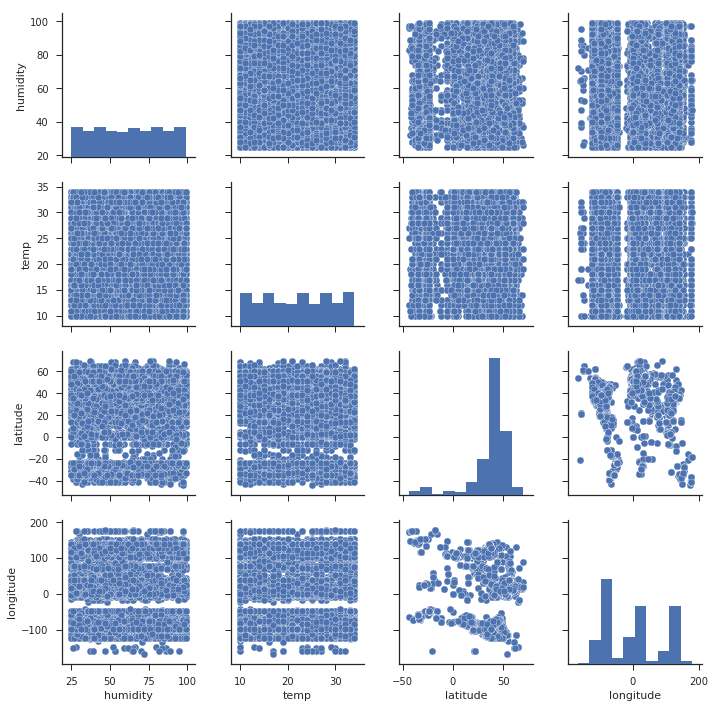

In [162]:
sns.set(style="ticks")
sns.pairplot(df_sample[["humidity","temp","latitude", "longitude"]])